In [2]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noload --quiet

<H1>NoLoad tutorial</H1>
Based on test functions: <A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization 2</H2>

<img src=".\img\bar2.png"/>
<img src=".\img\Rosenbrock.PNG"/>

<H3>function definition</H3>

In [12]:
def rosenbrock(x,y):
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr1=(x-1)**3-y+1
    ctr2=x+y-2
    return locals().items()

<H3>plot function</H3>

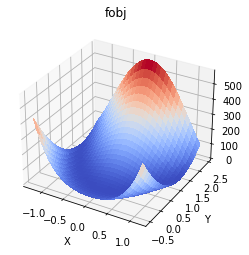

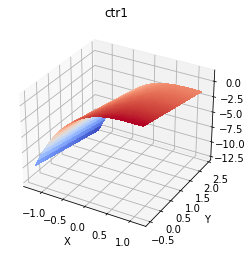

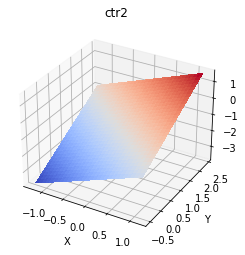

In [13]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(rosenbrock, [[-1.25,1.25],[-0.5,2.5]], outNames = ['fobj','ctr1','ctr2'])


<H3>optimize using NoLoad</H3>

Optimization terminated successfully    (Exit mode 0)
            Current function value: [5.42085619e-09]
            Iterations: 7
            Function evaluations: 8
            Gradient evaluations: 7
{'x': 0.9999975471448505, 'y': 1.0000024528551497}
{'fobj': 5.420856190159052e-09, 'ctr1': -2.4528551496594275e-06, 'ctr2': 0.0}


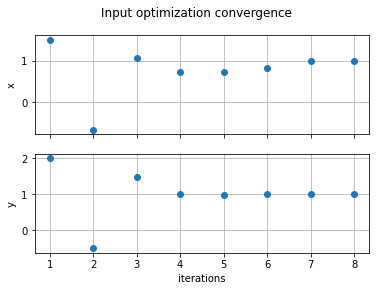

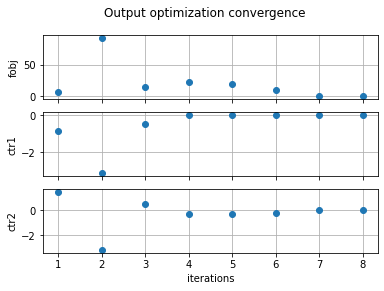

In [5]:
#Optimize with one equality constraint and an inequality one
from noload.optimization.optimProblem import Spec, OptimProblem


spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]}, eq_cstr={'ctr1':0},
            ineq_cstr={'ctr2':[None, 0]})


optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
result.plotResults()

In [6]:
#It is also possible to iterate by yourself to get results
for name, value in result.getLastInputs().items():
    print(name, '  \t =', value)
for name, value in result.getLastOutputs().items():
    print(name, '  \t =', value)

x   	 = 0.9999975471448505
y   	 = 1.0000024528551497
fobj   	 = 5.420856190159052e-09
ctr1   	 = -2.4528551496594275e-06
ctr2   	 = 0.0


Optimization terminated successfully    (Exit mode 0)
            Current function value: [5.19862556e-09]
            Iterations: 10
            Function evaluations: 11
            Gradient evaluations: 10
{'x': 0.9999963993636343, 'y': 0.9999999998935956}
{'fobj': 5.198625557105132e-09, 'ctr1': 1.0640444081388978e-10, 'ctr2': -3.6007427701711947e-06}


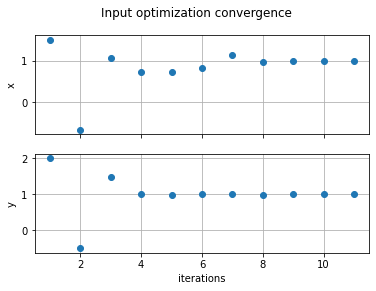

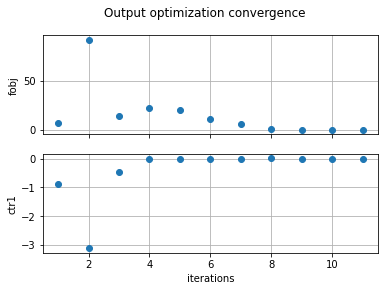

In [7]:
# Optimize with one equality constraint and the other one as FreeOutputs
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            eq_cstr={'ctr1': 0},freeOutputs=['ctr2'])

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
result.plotResults()

<H3>Rosenbrock function with vectorial constraints</H3>

In [8]:
def rosenbrock(x,y):
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr=[(x-1)**3-y+1 , x+y-2]
    return locals().items()

In [9]:
#Optimize with vectorial inequality constraints
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            ineq_cstr={'ctr':[[None, 0],[None, 0]]})

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
#result.plotResults()

Optimization terminated successfully    (Exit mode 0)
            Current function value: [2.88481749e-24]
            Iterations: 7
            Function evaluations: 14
            Gradient evaluations: 7
{'x': 1.0000000000000566, 'y': 0.9999999999999435}
{'fobj': 2.8848174917769927e-24, 'ctr': [5.651035195342047e-14, 0.0]}


In [10]:
#Optimize with vectorial equality constraints
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            eq_cstr={'ctr':[0,0]})

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
#result.plotResults()


Optimization terminated successfully    (Exit mode 0)
            Current function value: [9.9146614e-11]
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4
{'x': 1.0000003317236994, 'y': 0.9999996682763006}
{'fobj': 9.914661400142806e-11, 'ctr': [3.317236993982675e-07, 0.0]}
